# Univariate statistics

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/MWUrda/Statistiques_UGA_M1Eco_S1.git/HEAD)

Basics univariate statistics are required to explore dataset:

- Discover associations between a variable of interest and potential predictors. It is strongly recommended to start with simple univariate methods before moving to complex multivariate predictors. 

- Assess the prediction performances of machine learning predictors.

- Most of the univariate statistics are based on the linear model which is one of the main model in machine learning.

## Libraries

**Data**

In [1]:
import numpy as np
import pandas as pd

**Plots**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

**Statistics**

- Basic: [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
- Advanced: [statsmodels](https://www.statsmodels.org/). [statsmodels API](https://www.statsmodels.org/stable/api.html):
    * `statsmodels.api`: Cross-sectional models and methods. Canonically imported using `import statsmodels.api as sm`.
    * `statsmodels.formula.api`: A convenience interface for specifying models using formula strings and DataFrames. Canonically imported using import `statsmodels.formula.api as smf`
    * `statsmodels.tsa.api`: Time-series models and methods. Canonically imported using `import statsmodels.tsa.api as tsa`.

In [3]:
import scipy.stats
import statsmodels.api as sm
#import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import jarque_bera 

In [4]:
%matplotlib inline

**Dataset**

An extract from the 2012 French Employment Survey(Enquête Emploi) 

In [5]:
url='https://drive.google.com/file/d/15xHcw3DTdGxNVoCIAVK3mkF5VOVI4Ki-/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.info()

/Users/michalurdanivia/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (155,156,158,162,165,173) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31045 entries, 0 to 31044
Columns: 801 entries, Unnamed: 0 to regzus941
dtypes: float64(401), int64(358), object(42)
memory usage: 189.7+ MB


In [4]:
ee12_extract = pd.read_csv('/Volumes/GoogleDrive/Mon Drive/eemploi2012extract/eemploi2012_s0.csv', low_memory=False)
ee12_extract.info()
# Les données sont ici: 
# https://drive.google.com/drive/folders/1qluzqqon8_sF9B0RJ1eqRIqUld0xbBW6?usp=sharing
# Les télécharger est changer l'emplacement dans le code ci-dessus.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31045 entries, 0 to 31044
Columns: 801 entries, Unnamed: 0 to regzus941
dtypes: float64(401), int64(358), object(42)
memory usage: 189.7+ MB


In [4]:
ee12_extract = ee12_extract[['ACTEU', 'SEXE', 'DDIPL', 'FORDAT', 'MATRI', 'TYPMEN5', 'ZUS', 'REG','AG', 
             'AGQ', 'AGEQ','AGE','AG5','NBENF3', 'NBENF6', 'NBENF18', 'SALRED', 'NBHEUR', 
             'NATPERC','NATMERC', 'PAIPERC','PAIMERC','TRIM', 'RGI', 'IDENT', 'NOI', 
             'DIP', 'DIP11','CONTRA','CSER', 'CSPM', 'CSPP', 'ANNEE', 'CHPUB', 'NAFG4N', 
             'ANCENTR4', 'exper', 'adfe', 'lsalhor', 'EXTRI13']][ee12_extract.ACTEU == 1]
print(ee12_extract.shape)
print(ee12_extract.info())

(19764, 40)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19764 entries, 0 to 31044
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ACTEU     19764 non-null  int64  
 1   SEXE      19764 non-null  int64  
 2   DDIPL     19764 non-null  int64  
 3   FORDAT    19764 non-null  int64  
 4   MATRI     19764 non-null  int64  
 5   TYPMEN5   19764 non-null  int64  
 6   ZUS       19764 non-null  int64  
 7   REG       19764 non-null  int64  
 8   AG        19764 non-null  int64  
 9   AGQ       19764 non-null  int64  
 10  AGEQ      19764 non-null  int64  
 11  AGE       19764 non-null  int64  
 12  AG5       19764 non-null  int64  
 13  NBENF3    19764 non-null  int64  
 14  NBENF6    19764 non-null  int64  
 15  NBENF18   19764 non-null  int64  
 16  SALRED    19764 non-null  float64
 17  NBHEUR    19764 non-null  float64
 18  NATPERC   19764 non-null  int64  
 19  NATMERC   19764 non-null  int64  
 20  PAIPERC   19764 


## Estimators of the main statistical measures


### Mean

Properties of the expected value operator $\operatorname{E}(\cdot)$ of a random variable $X$

\begin{align}
    \operatorname{E}(X + c) &= \operatorname{E}(X) + c \\ 
    \operatorname{E}(X + Y) &= \operatorname{E}(X) + \operatorname{E}(Y) \\ 
    \operatorname{E}(aX)    &= a \operatorname{E}(X)
\end{align}


The estimator $\bar{X}$ on a sample of size $n$: $X = X_1, ..., X_n$ is given by
$$
    \bar{X} = \frac{1}{n} \sum_i X_i
$$

$\bar{X}$ is itself a random variable with properties:

- $\operatorname{E}(\bar{X}) = \bar{X}$,

- $\operatorname{Var}(\bar{X}) = \frac{\operatorname{Var}(X)}{n}$.

### Variance

$$
    \operatorname{Var}(X) = \operatorname{E}((X - \operatorname{E}(X))^2) =  \operatorname{E}(X^2) - (\operatorname{E}(X))^2
$$

The estimator is
$$
    \sigma_X^2 = \frac{1}{n-1} \sum_i (X_i - \bar{X})^2
$$

Note here the subtracted 1 degree of freedom (df) in the divisor. In standard statistical practice, $df=1$ provides an unbiased estimator of the variance of a hypothetical infinite population. With $df=0$ it instead provides a maximum likelihood estimate of the variance for normally distributed variables.

### Standard deviation

$$
    \operatorname{Std}(X) = \sqrt{\operatorname{Var}(X)}
$$

The estimator is simply $\sigma_X = \sqrt{\sigma_X^2}$.

### Covariance

$$
    \operatorname{Cov}(X, Y) = \operatorname{E}((X - \operatorname{E}(X))(Y - \operatorname{E}(Y))) =  \operatorname{E}(XY) - \operatorname{E}(X)\operatorname{E}(Y).
$$

Properties:

\begin{align}
    \operatorname{Cov}(X, X) &= \operatorname{Var}(X)\\
    \operatorname{Cov}(X, Y) &= \operatorname{Cov}(Y, X)\\
    \operatorname{Cov}(cX, Y) &= c \operatorname{Cov}(X, Y)\\
    \operatorname{Cov}(X+c, Y) &= \operatorname{Cov}(X, Y)\\
\end{align}


The estimator with $df=1$ is
$$
    \sigma_{XY} = \frac{1}{n-1} \sum_i (X_i - \bar{X}) (Y_i - \bar{Y}).
$$

### Correlation

$$
    \operatorname{Cor}(X, Y) = \frac{\operatorname{Cov}(X, Y)}{\operatorname{Std}(X)\operatorname{Std}(Y)}
$$

The estimator is
$$
    \rho_{XY} = \frac{\sigma_{XY}}{\sigma_{X} \sigma_{Y}}.
$$

### Standard Error (SE) 

The standard error (SE) is the standard deviation (of the sampling distribution) of a statistic: 
$$
    \operatorname{SE}(X) = \frac{\operatorname{Std}(X)}{\sqrt{n}}.
$$

It is most commonly considered for the mean with the estimator

\begin{align}
\operatorname{SE}(X) &= \operatorname{Std}(X) = \sigma_{\bar{X}}\\
      &= \frac{\sigma_X}{\sqrt{n}}.
\end{align}


### Descriptives statistics with numpy

- Generate 2 random samples: $x \sim N(1.78, 0.1)$ and $y \sim N(1.66, 0.1)$, both of size 10.

- Compute $\bar{x}, \sigma_x, \sigma_{xy}$ (`xbar, xvar, xycov`) using only the `np.sum()` operation. 
Explore the `np.` module to find out which numpy functions performs the same computations and compare them (using `assert`) with your previous results.

Caution! By default `np.var()` used the biased estimator (with ddof=0). Set ddof=1 to use unbiased estimator.

In [ ]:
n = 10
x = np.random.normal(loc=1.78, scale=.1, size=n)
y = np.random.normal(loc=1.66, scale=.1, size=n)

xbar = np.mean(x)
assert xbar == np.sum(x) / x.shape[0]

xvar = np.var(x, ddof=1)
assert xvar == np.sum((x - xbar) ** 2) / (n - 1)

xycov = np.cov(x, y)
print(xycov)

ybar = np.sum(y) / n
assert np.allclose(xycov[0, 1], np.sum((x - xbar) * (y - ybar)) / (n - 1))
assert np.allclose(xycov[0, 0], xvar)
assert np.allclose(xycov[1, 1], np.var(y, ddof=1))

### On the french employment survey extract

**With Pandas**

Columns' means for continuous the monthly wage, and age

In [47]:
ee12_extract[['SALRED', 'NBHEUR', 'AGE']].mean()

SALRED    1740.261182
NBHEUR     143.733455
AGE         40.818964
dtype: float64

Columns' std-dev. Pandas normalizes by N-1 by default.

In [48]:
ee12_extract[['SALRED', 'NBHEUR', 'AGE']].std()

SALRED    1342.283886
NBHEUR      30.613752
AGE         10.470687
dtype: float64

**With Numpy**

In [37]:
X = ee12_extract[['SALRED', 'NBHEUR', 'AGE']].values
print(ee12_extract[['SALRED', 'NBHEUR', 'AGE']].columns)
X.mean(axis=0)

Index(['SALRED', 'NBHEUR', 'AGE'], dtype='object')


array([1740.26118195,  143.73345477,   40.81896377])

Columns' std-dev. Numpy normalizes by N by default. Set ddof=1 to normalize by N-1 to get the unbiased estimator.

In [27]:
X.std(axis=0, ddof=1)

array([1342.28388556,   30.61375236,   10.47068722])

## Main distributions

### Normal distribution

The normal distribution, noted $\mathcal{N}(\mu, \sigma)$ with parameters: $\mu$ mean (location) and $\sigma>0$ std-dev. Estimators: $\bar{X}$ and $\sigma_{X}$.

The normal distribution, noted $\mathcal{N}$, is useful because of the central limit theorem (CLT) which states that: given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables, each with a well-defined expected value and well-defined variance, will be approximately normally distributed, regardless of the underlying distribution.

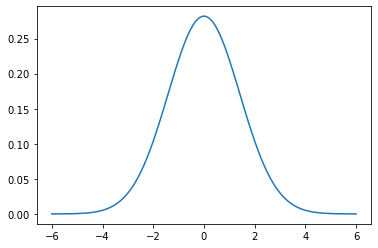

In [28]:
mu = 0 # mean
variance = 2 #variance
sigma = np.sqrt(variance) #standard deviation",
x = np.linspace(mu - 3 * variance, mu + 3 * variance, 100)
_ = plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))

### The Chi-Square distribution

The chi-square or $\chi_n^2$ distribution with $n$ degrees of freedom (df) is the distribution of a sum of the squares of $n$ independent standard normal random variables $\mathcal{N}(0, 1)$. Let $X \sim \mathcal{N}(\mu, \sigma^2)$, then, $Z=(X - \mu)/\sigma \sim \mathcal{N}(0, 1)$, then:

- The squared standard $Z^2 \sim \chi_1^2$ (one df).

- **The distribution of sum of squares** of $n$ normal random variables: $\sum_i^n Z_i^2 \sim \chi_n^2$

The sum of two $\chi^2$ RV with $p$ and $q$ df is a $\chi^2$ RV with $p+q$ df. This is useful when summing/subtracting sum of squares.

The $\chi^2$-distribution is used to model **errors** measured as **sum of squares** or the distribution of the sample **variance**.

### The Fisher's F-distribution

The $F$-distribution, $F_{n, p}$, with $n$ and $p$ degrees of freedom is the ratio of two independent $\chi^2$ variables. Let $X \sim \chi_n^2$ and $Y \sim \chi_p^2$ then: 
$$
    F_{n, p} = \frac{X/n}{Y/p}
$$

The $F$-distribution plays a central role in hypothesis testing answering the question: **Are two variances equals?, is the ratio or two errors significantly large ?**.

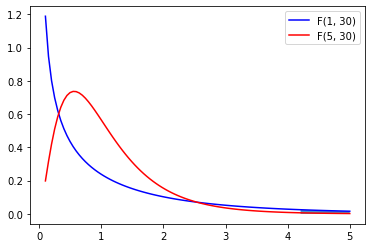

In [29]:
fvalues = np.linspace(.1, 5, 100)

# pdf(x, df1, df2): Probability density function at x of F.
plt.plot(fvalues, scipy.stats.f.pdf(fvalues, 1, 30), 'b-', label="F(1, 30)")
plt.plot(fvalues, scipy.stats.f.pdf(fvalues, 5, 30), 'r-', label="F(5, 30)")
plt.legend()

# cdf(x, df1, df2): Cumulative distribution function of F.
# ie. 
proba_at_f_inf_3 = scipy.stats.f.cdf(3, 1, 30) # P(F(1,30) < 3)

# ppf(q, df1, df2): Percent point function (inverse of cdf) at q of F.
f_at_proba_inf_95 = scipy.stats.f.ppf(.95, 1, 30) # q such P(F(1,30) < .95)
assert scipy.stats.f.cdf(f_at_proba_inf_95, 1, 30) == .95

# sf(x, df1, df2): Survival function (1 - cdf) at x of F.
proba_at_f_sup_3 = scipy.stats.f.sf(3, 1, 30) # P(F(1,30) > 3)
assert  proba_at_f_inf_3 + proba_at_f_sup_3 == 1

# p-value: P(F(1, 30)) < 0.05
low_proba_fvalues = fvalues[fvalues > f_at_proba_inf_95]
plt.fill_between(low_proba_fvalues, 0, scipy.stats.f.pdf(low_proba_fvalues, 1, 30),
                 alpha=.8, label="P < 0.05")
plt.show()

### The  Student's $t$-distribution

Let $M \sim \mathcal{N}(0, 1)$ and $V \sim \chi_n^2$. The $t$-distribution, $T_n$, with $n$ degrees of freedom is the ratio:
$$
    T_n = \frac{M}{\sqrt{V/n}}
$$

The distribution of the difference between an estimated parameter and its true (or assumed) value divided by the standard deviation of the estimated parameter (standard error) follow a $t$-distribution. **Is this parameters different from a given value?**

## Hypothesis Testing

**Examples**

- Test a proportion: Biased coin ? 200 heads have been found over 300 flips, is it coins biased ?

- Test the association between two variables.
    * Exemple height and sex: In a sample of 25 individuals (15 females, 10 males), is female height is different from male height ? 
    * Exemple age and arterial hypertension: In a sample of 25 individuals is age height correlated with arterial hypertension ? 

**Steps**

1. Model the data

2. Fit: estimate the model parameters (frequency, mean, correlation, regression coefficient)

3. Compute a test statistic from model the parameters.

4. Formulate the null hypothesis: What would be the (distribution of the) test statistic if the observations are the result of pure chance.

5. Compute the probability ($p$-value) to obtain a larger value for the test statistic by chance (under the null hypothesis).


### Flip coin: Simplified example

Biased coin ? 2 heads have been found over 3 flips, is it coins biased ?

1. Model the data: number of heads follow a Binomial disctribution.

2. Compute model parameters: N=3, P = the frequency of number of heads over the number of flip: 2/3.

3. Compute a test statistic, same as frequency.

2. Under the null hypothesis the distribution of the number of tail is:

| 1 | 2 | 3 | count #heads |
|---|---|---|--------------|
|   |   |   | 0            |
| H |   |   | 1            |
|   | H |   | 1            |
|   |   | H | 1            |
| H | H |   | 2            |
| H |   | H | 2            |
|   | H | H | 2            |
| H | H | H | 3            |


8 possibles configurations, probabilities of differents values for $p$ are:
$x$ measure the number of success.

- $P(x=0) = 1/8$
- $P(x=1) = 3/8$
- $P(x=2) = 3/8$
- $P(x=3) = 1/8$

Text(0.5, 0, 'Distribution of the number of head over 3 flip under the null hypothesis')

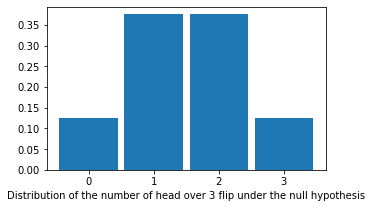

In [30]:
plt.figure(figsize=(5, 3))
plt.bar([0, 1, 2, 3], [1/8, 3/8, 3/8, 1/8], width=0.9)
_ = plt.xticks([0, 1, 2, 3], [0, 1, 2, 3])
plt.xlabel("Distribution of the number of head over 3 flip under the null hypothesis")

3. Compute the probability ($p$-value) to observe a value larger or equal that 2 under the null hypothesis ?
This probability is the $p$-value:
$$
P(x\geq 2| H_0) = P(x=2) + P(x=3) = 3/8 + 1/8 = 4/8 = 1/2
$$

### Flip coin: Real Example

Biased coin ? 60 heads have been found over 100 flips, is it coins biased ?

1. Model the data: number of heads follow a Binomial disctribution.

2. Compute model parameters: N=100, P=60/100.

3. Compute a test statistic, same as frequency.

4. Compute a test statistic: 60/100.

5. Under the null hypothesis the distribution of the number of tail ($k$) follow the **binomial distribution** of parameters N=100, **P=0.5**:
$$
Pr(X=k|H_0) = Pr(X=k|n=100, p=0.5) = {100 \choose k}0.5^k (1-0.5)^{(100-k)}.
$$

\begin{align*}
P(X=k\geq 60|H_0) &=  \sum_{k=60}^{100}{100 \choose k}0.5^k (1-0.5)^{(100-k)}\\
 &= 1 - \sum_{k=1}^{60}{100 \choose k}0.5^k (1-0.5)^{(100-k)}, \text{the cumulative distribution function.}
\end{align*} 

**Use tabulated binomial distribution**

In [ ]:
succes = np.linspace(30, 70, 41)
plt.plot(succes, scipy.stats.binom.pmf(succes, 100, 0.5),
         'b-', label="Binomial(100, 0.5)")
upper_succes_tvalues = succes[succes > 60]
plt.fill_between(upper_succes_tvalues, 0,
                 scipy.stats.binom.pmf(upper_succes_tvalues, 100, 0.5),
                 alpha=.8, label="p-value")
_ = plt.legend()


pval = 1 - scipy.stats.binom.cdf(60, 100, 0.5)
print(pval)

**Random sampling of the Binomial distribution under the null hypothesis**

In [ ]:
sccess_h0 = scipy.stats.binom.rvs(100, 0.5, size=10000, random_state=4)
print(sccess_h0)

pval_rnd = np.sum(sccess_h0 >= 60) / (len(sccess_h0) + 1)
print("P-value using monte-carlo sampling of the Binomial distribution under H0=",
      pval_rnd)

###  One sample $t$-test

The one-sample $t$-test is used to determine whether a sample comes from a population with a specific mean. For example you want to test if the average height of a population is $1.75~m$.

#### Assumptions

1. Independence of **residuals** ($\varepsilon_i$). This assumptions **must** be satisfied.
2. Normality of residuals. Approximately normally distributed can be accepted.

Remarks: Although the parent population does not need to be normally distributed, the distribution of the population of sample means, $\overline{x}$, is assumed to be normal. By the central limit theorem, if the sampling of the parent population is independent then the sample means will be approximately normal.

#### 1 Model the data

Assume that height is normally distributed: $X \sim \mathcal{N}(\mu, \sigma)$, ie:

\begin{align}
\text{height}_i &= \text{average height over the population} + \text{error}_i\\
X_i &= \bar{X} + \varepsilon_i
\end{align}

The $\varepsilon_i$ are called the residuals

#### 2 Fit: estimate the model parameters

  $\bar{X}, s_X$ are the estimators of $\mu, \sigma$.

#### 3 Compute a test statistic

In testing the null hypothesis that the population mean is equal to a specified value $\mu_0=1.75$, one uses the statistic:

\begin{align}
 t &= \frac{\text{difference of means}}{\text{std-dev of noise}} \sqrt{n}\\
 t &= \text{effect size} \sqrt{n}\\ 
 t &= \frac{\bar{X} - \mu_0}{s_X} \sqrt{n} 
\end{align}


#### 4 Compute the probability of the test statistic under the null hypothesis. This require to have the distribution of the t statistic under $H_0$.

#### Example

Given the following samples, we will test whether its true mean is 1.75.

Warning, when computing the std or the variance, set `ddof=1`. The default
value, `ddof=0`, leads to the biased estimator of the variance.

In [32]:
X = [1.83,  1.83,  1.73,  1.82,  1.83,  1.73,  1.99,  1.85,  1.68,  1.87]

Xbar = np.mean(X)  # sample mean
mu0 = 1.75  # hypothesized value
s = np.std(X, ddof=1)  # sample standard deviation
n = len(X)  # sample size

print(Xbar)

tobs = (Xbar - mu0) / (s / np.sqrt(n)) 
print(tobs)

1.816
2.3968766311585883


The **$p$-value** is the probability to observe a value $t$ more extreme than the observed one $t_{obs}$ under the null hypothesis $H_0$: $P(t > t_{obs} | H_0)$

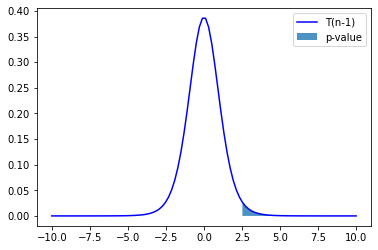

In [46]:
tvalues = np.linspace(-10, 10, 100)
plt.plot(tvalues, scipy.stats.t.pdf(tvalues, n-1), 'b-', label="T(n-1)")
upper_tval_tvalues = tvalues[tvalues > tobs]
plt.fill_between(upper_tval_tvalues, 0, scipy.stats.t.pdf(upper_tval_tvalues, n-1),
                 alpha=.8, label="p-value")
_ = plt.legend()

## Testing pairwise associations

Univariate statistical analysis: explore association betweens pairs of variables.


- In statistics, a **categorical variable** or **factor** is a variable that can take on one of a limited, and usually fixed, number of possible values, thus assigning each individual to a particular group or "category". The levels are the possibles values of the variable. Number of levels = 2: binomial; Number of levels > 2: multinomial. There is no intrinsic ordering to the categories.  For example, gender is a categorical variable having two categories (male and female) and there is no intrinsic ordering to the categories. For example, Sex (Female, Male), Hair color (blonde, brown, etc.).

- An **ordinal variable** is a categorical variable with a clear ordering of the levels. For example: drinks per day (none, small, medium and high).

- A **continuous** or **quantitative variable** $X \in \mathbb{R}$ is one that can take any value in a range of possible values, possibly infinite.  E.g.: salary, experience in years, weight.

**What statistical test should I use?**

See: http://www.ats.ucla.edu/stat/mult_pkg/whatstat/

![Statistical tests](images/stat_tests_flowchart.png)


## Pearson correlation test: test association between two quantitative variables

Test the correlation coefficient of two quantitative variables. The test calculates a Pearson correlation coefficient and the $p$-value for testing non-correlation.

Let $x$ and $y$ two quantitative variables, where $n$ samples were obeserved. The linear correlation coeficient is defined as :

$$r=\frac{\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\sqrt{\sum_{i=1}^n(x_i-\bar x)^2}\sqrt{\sum_{i=1}^n(y_i-\bar y)^2}}.$$

Under $H_0$, the test statistic $t=\sqrt{n-2}\frac{r}{\sqrt{1-r^2}}$ follow Student distribution with $n-2$ degrees of freedom.

In [ ]:
n = 50
x = np.random.normal(size=n)
y = 2 * x + np.random.normal(size=n)

# Compute with scipy
cor, pval = scipy.stats.pearsonr(x, y)
print(cor, pval)

## Two sample (Student) $t$-test: compare two means

![Two-sample model](images/model_two-sample.png){width=7cm}

The two-sample $t$-test (Snedecor and Cochran, 1989) is used to determine if two population means are equal. There are several variations on this test.
If data are paired (e.g. 2 measures, before and after treatment for each individual) use the one-sample $t$-test of the difference. The variances of the two samples may be assumed to be equal (a.k.a. homoscedasticity) or unequal (a.k.a. heteroscedasticity).


### Assumptions

1. Independence of **residuals** ($\varepsilon_i$). This assumptions **must** be satisfied.
2. Normality of residuals. Approximately normally distributed can be accepted.
3. Homosedasticity use T-test, Heterosedasticity use Welch t-test.


### 1. Model the data

Assume that the two random variables are normally distributed: $y_1 \sim \mathcal{N}(\mu_{1}, \sigma_{1}), y_2 \sim \mathcal{N}(\mu_{2}, \sigma_2)$.

### 2. Fit: estimate the model parameters

Estimate means and variances: $\bar{y_1}, s^2_{y_1}, \bar{y_2}, s^2_{y_2}$.

### 3. $t$-test

The general principle is 

\begin{align}
t &= \frac{\text{difference of means}}{\text{standard dev of error}}\\
  &= \frac{\text{difference of means}}{\text{its standard error}}\\
  &= \frac{\bar{y_1}-\bar{y_2}}{\sqrt{\sum\varepsilon^2}}\sqrt{n-2}\\
&= \frac{\bar{y_1}-\bar{y_2}}{s_{\bar{y_1}-\bar{y_2}}}
\end{align}

Since $y_1$ and $y_2$ are independant:

\begin{align}
s^2_{\bar{y_1}-\bar{y_2}} &= s^2_{\bar{y_1}} + s^2_{\bar{y_2}} = \frac{s^2_{y_1}}{n_1} + \frac{s^2_{y_2}}{n_2}\\
\text{thus}\\
s_{\bar{y_1}-\bar{y_2}} &= \sqrt{\frac{s^2_{y_1}}{n_1} + \frac{s^2_{y_2}}{n_2}}
\end{align}

#### Equal or unequal sample sizes, unequal variances (Welch's $t$-test)

Welch's $t$-test defines the $t$ statistic as

$$
t = \frac{\bar{y_1} - \bar{y_2}}{\sqrt{\frac{s^2_{y_1}}{n_1} + \frac{s^2_{y_2}}{n_2}}}.
$$

To compute the $p$-value one needs the degrees of freedom associated with this variance estimate. It is approximated using the Welch–Satterthwaite equation:

$$
\nu \approx \frac{\left(\frac{s^2_{y_1}}{n_1} + \frac{s^2_{y_2}}{n_2}\right)^2}{\frac{s^4_{y_1}}{n_1^2(n_1-1)} + \frac{s^4_{y_2}}{n_2^2(n_2-1)}}.
$$

#### Equal or unequal sample sizes, equal variances

If we assume equal variance (ie, $s^2_{y_1} = s^2_{y_1} = s^2$), where $s^2$ is an estimator of the common variance of the two samples:

\begin{align}
s^2 &= \frac{s_{y_1}^2(n_1-1)+s_{y_2}^2(n_2-1)}{n_1+n_2-2}\\
    &= \frac{\sum_i^{n_1} (y_{1i} -\bar{y_1})^2 + \sum_j^{n_2} (y_{2j} -\bar{y_2})^2}{(n_1 - 1) + (n_2 - 1)}
\end{align}


then

$$
s_{\bar{y_1}-\bar{y_2}} = \sqrt{\frac{s^2}{n_1} + \frac{s^2}{n_2}} = s \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}
$$

Therefore, the $t$ statistic, that is used to test whether the means are different is:

$$
t = \frac{\bar{y_1} - \bar{y_2}}{s \cdot \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}},
$$

#### Equal sample sizes, equal variances

If we simplify the problem assuming equal samples of size $n_1 = n_2 = n$ we get

\begin{align}
t &= \frac{\bar{y_1} - \bar{y_2}}{s \sqrt{2}} \cdot \sqrt{n}\\
&\approx \text{effect size} \cdot \sqrt{n}\\
&\approx \frac{\text{difference of means}}{\text{standard deviation of the noise}} \cdot \sqrt{n}
\end{align}


#### Example

Given the following two samples, test whether their means are equal using the **standard t-test, assuming equal variance**.

In [ ]:
height = np.array([ 1.83,  1.83,  1.73,  1.82,  1.83,  1.73,  1.99,  1.85,  1.68,  1.87,
                    1.66,  1.71,  1.73,  1.64,  1.70,  1.60,  1.79,  1.73,  1.62,  1.77])

grp = np.array(["M"] * 10 + ["F"] * 10)

# Compute with scipy
scipy.stats.ttest_ind(height[grp == "M"], height[grp == "F"], equal_var=True)

## ANOVA $F$-test (quantitative ~ categorial (>=2 levels))

Analysis of variance (ANOVA) provides a statistical test of whether or not the means of several (k) groups are equal, and therefore generalizes the $t$-test to more than two groups. ANOVAs are useful for comparing (testing) three or more means (groups or variables) for statistical significance. It is conceptually similar to multiple two-sample $t$-tests, but is less conservative.

Here we will consider one-way ANOVA with one independent variable, ie one-way anova.

[Wikipedia](https://en.wikipedia.org/wiki/F-test):

- Test if any group is on average superior, or inferior, to the others versus the null hypothesis that all four strategies yield the same mean response

- Detect any of several possible differences.

- The advantage of the ANOVA $F$-test is that we do not need to pre-specify which strategies are to be compared, and we do not need to adjust for making multiple comparisons.

- The disadvantage of the ANOVA $F$-test is that if we reject the null hypothesis, we do not know which strategies can be said to be significantly different from the others.

### Assumptions

1. The samples are randomly selected in an independent manner from the k populations.
2. All k populations have distributions that are approximately normal. Check by plotting groups distribution.
3. The k population variances are equal. Check by plotting groups distribution.

### 1. Model the data

Is there a difference in Petal Width in species from iris dataset.
Let $y_1, y_2$ and $y_3$ be Petal Width in three species.

Here we assume (see assumptions) that the three populations were sampled from three random variables that are normally distributed. I.e., $Y_1 \sim N(\mu_1, \sigma_1), Y_2 \sim N(\mu_2, \sigma_2)$ and $Y_3 \sim N(\mu_3, \sigma_3)$.

### 2. Fit: estimate the model parameters

Estimate means and variances: $\bar{y}_i, \sigma_i,\;\; \forall i \in \{1, 2, 3\}$.

### 3. $F$-test

The formula for the one-way ANOVA F-test statistic is

\begin{align}
F &= \frac{\text{Explained variance}}{\text{Unexplained variance}}\\
&=\frac{\text{Between-group variability}}{\text{Within-group variability}} = \frac{s^2_B}{s^2_W}.
\end{align}


The "explained variance", or "between-group variability" is

$$
s^2_B = \sum_i n_i(\bar{y}_{i\cdot} - \bar{y})^2/(K-1),
$$

where $\bar{y}_{i\cdot}$ denotes the sample mean in the $i$th group, $n_i$ is the number of observations in the $i$th group, $\bar{y}$ denotes the overall mean of the data, and $K$ denotes the number of groups.

The "unexplained variance", or "within-group variability" is

$$
s^2_W = \sum_{ij} (y_{ij}-\bar{y}_{i\cdot})^2/(N-K), 
$$

where $y_{ij}$ is the $j$th observation in the $i$th out of $K$ groups and $N$ is the overall sample size. This $F$-statistic follows the $F$-distribution with $K-1$ and $N-K$ degrees of freedom under the null hypothesis. The statistic will be large if the between-group variability is large relative to the within-group variability, which is unlikely to happen if the population means of the groups all have the same value.

Note that when there are only two groups for the one-way ANOVA F-test, $F=t^2$ where $t$ is the Student's $t$ statistic.

Iris dataset:

In [ ]:
# Group means
means = iris.groupby("Species").mean().reset_index()
print(means)

# Group Stds (equal variances ?)
stds = iris.groupby("Species").std(ddof=1).reset_index()
print(stds)

# Plot groups
ax = sns.violinplot(x="Species", y="SepalLength", data=iris)
ax = sns.swarmplot(x="Species", y="SepalLength", data=iris,
                   color="white")
ax = sns.swarmplot(x="Species", y="SepalLength",  color="black", data=means, size=10)

# ANOVA
lm = smf.ols('SepalLength ~ Species', data=iris).fit()
sm.stats.anova_lm(lm, typ=2) # Type 2 ANOVA DataFrame

## Chi-square, $\chi^2$ (categorial ~ categorial)

Computes the chi-square, $\chi^2$, statistic and $p$-value for the hypothesis test of independence of frequencies in the observed contingency table (cross-table). The observed frequencies are tested against an expected contingency table obtained by computing expected frequencies based on the marginal sums under the assumption of independence.

Example: 20 participants: 10 exposed to some chemical product and 10 non exposed (exposed = 1 or 0). Among the 20 participants 10 had cancer 10 not (cancer = 1 or 0). $\chi^2$ tests the association between those two variables.

In [ ]:
# Dataset:
# 15 samples:
# 10 first exposed
exposed = np.array([1] * 10 + [0] * 10)
# 8 first with cancer, 10 without, the last two with.
cancer = np.array([1] * 8 + [0] * 10 + [1] * 2)

crosstab = pd.crosstab(exposed, cancer, rownames=['exposed'],
                       colnames=['cancer'])
print("Observed table:")
print("---------------")
print(crosstab)

chi2, pval, dof, expected = scipy.stats.chi2_contingency(crosstab)
print("Statistics:")
print("-----------")
print("Chi2 = %f, pval = %f" % (chi2, pval))
print("Expected table:")
print("---------------")
print(expected)

Computing expected cross-table

In [ ]:
# Compute expected cross-table based on proportion
exposed_marg = crosstab.sum(axis=0)
exposed_freq = exposed_marg / exposed_marg.sum()

cancer_marg = crosstab.sum(axis=1)
cancer_freq = cancer_marg / cancer_marg.sum()

print('Exposed frequency? Yes: %.2f' % exposed_freq[0],
      'No: %.2f' % exposed_freq[1])
print('Cancer frequency? Yes: %.2f' % cancer_freq[0],
      'No: %.2f' % cancer_freq[1])

print('Expected frequencies:')
print(np.outer(exposed_freq, cancer_freq))

print('Expected cross-table (frequencies * N): ')
print(np.outer(exposed_freq, cancer_freq) * len(exposed))

## Non-parametric test of pairwise associations

### Spearman rank-order correlation (quantitative ~ quantitative)

The Spearman correlation is a non-parametric measure of the monotonicity of the relationship between two datasets.

When to use it? Observe the data distribution:
- presence of **outliers**
- the distribution of the residuals is not Gaussian.

Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as $x$ increases, so does $y$. Negative correlations imply that as $x$ increases, $y$ decreases.

In [ ]:
np.random.seed(3)

# Age uniform distribution between 20 and 40
age = np.random.uniform(20, 60, 40)

# Systolic blood presure, 2 groups:
# - 15 subjects at 0.05 * age + 6
# - 25 subjects at 0.15 * age + 10
sbp = np.concatenate((0.05 * age[:15] + 6, 0.15 * age[15:] + 10)) + \
    .5 * np.random.normal(size=40)

sns.regplot(x=age, y=sbp)

# Non-Parametric Spearman
cor, pval = scipy.stats.spearmanr(age, sbp)
print("Non-Parametric Spearman cor test, cor: %.4f, pval: %.4f" % (cor, pval))

# "Parametric Pearson cor test
cor, pval = scipy.stats.pearsonr(age, sbp)
print("Parametric Pearson cor test: cor: %.4f, pval: %.4f" % (cor, pval))

### Wilcoxon signed-rank test (quantitative ~ cte)

Source: https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

The Wilcoxon signed-rank test is a non-parametric statistical hypothesis test used when comparing two related samples, matched samples, or repeated measurements on a single sample to assess whether their population mean ranks differ (i.e. it is a paired difference test). It is equivalent to one-sample test of the difference of paired samples.

It can be used as an alternative to the paired Student's $t$-test, $t$-test for matched pairs, or the $t$-test for dependent samples when the population cannot be assumed to be normally distributed.

When to use it? Observe the data distribution:
- presence of outliers
- the distribution of the residuals is not Gaussian

It has a lower sensitivity compared to $t$-test. May be problematic to use when the sample size is small.

Null hypothesis $H_0$: difference between the pairs follows a symmetric distribution around zero.

In [ ]:
n = 20
# Buisness Volume time 0
bv0 = np.random.normal(loc=3, scale=.1, size=n)
# Buisness Volume time 1
bv1 = bv0 + 0.1 + np.random.normal(loc=0, scale=.1, size=n)

# create an outlier
bv1[0] -= 10

# Paired t-test
print(scipy.stats.ttest_rel(bv0, bv1))

# Wilcoxon
print(scipy.stats.wilcoxon(bv0, bv1))

### Mann–Whitney $U$ test (quantitative ~ categorial (2 levels))

In statistics, the Mann–Whitney $U$ test (also called the Mann–Whitney–Wilcoxon, Wilcoxon rank-sum test or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis that two samples come from the same population against an alternative hypothesis, especially that a particular population tends to have larger values than the other.

It can be applied on unknown distributions contrary to e.g. a $t$-test that has to be applied only on normal distributions, and it is nearly as efficient as the $t$-test on normal distributions.

In [ ]:
n = 20
# Buismess Volume group 0
bv0 = np.random.normal(loc=1, scale=.1, size=n)

# Buismess Volume group 1
bv1 = np.random.normal(loc=1.2, scale=.1, size=n)

# create an outlier
bv1[0] -= 10

# Two-samples t-test
print(scipy.stats.ttest_ind(bv0, bv1))

# Wilcoxon
print(scipy.stats.mannwhitneyu(bv0, bv1))

## Linear model

![Linear model](images/model_lm.png){width=5cm}


Given $n$ random samples $(y_i, x_{1i}, \ldots, x_{pi}), \, i = 1, \ldots, n$, the linear regression models the relation between the observations $y_i$ and the independent variables $x_i^p$ is formulated as

$$
    y_i = \beta_0 + \beta_1 x_{1i} + \cdots + \beta_p x_{pi} + \varepsilon_i \qquad i = 1, \ldots, n 
$$

- The $\beta$'s are the model parameters, ie, the regression coeficients.
- $\beta_0$ is the intercept or the bias.
- $\varepsilon_i$ are the **residuals**.
- **An independent variable (IV)**. It is a variable that stands alone and isn't changed by the other variables you are trying to measure. For example, someone's age might be an independent variable. Other factors (such as what they eat, how much they go to school, how much television they watch) aren't going to change a person's age. In fact, when you are looking for some kind of relationship between variables you are trying to see if the independent variable causes some kind of change in the other variables, or dependent variables. In Machine Learning, these variables are also called the **predictors**.

- A **dependent variable**. It is something that depends on other factors. For example, a test score could be a dependent variable because it could change depending on several factors such as how much you studied, how much sleep you got the night before you took the test, or even how hungry you were when you took it. Usually when you are looking for a relationship between two things you are trying to find out what makes the dependent variable change the way it does. In Machine Learning this variable is called a **target variable**.

### Assumptions

1. Independence of residuals ($\varepsilon_i$). This assumptions **must** be satisfied
2. Normality of residuals ($\varepsilon_i$). Approximately normally distributed can be accepted.

[Regression diagnostics:  testing the assumptions of linear regression](http://people.duke.edu/~rnau/testing.htm)

### Simple regression: test association between two quantitative variables

Using the dataset "salary", explore the association between the dependant variable (e.g. Salary) and the independent variable (e.g.: Experience is quantitative), considering only non-managers.

In [ ]:
df = salary[salary.management == 'N']

#### 1. Model the data

Model the data on some **hypothesis** e.g.: salary is a linear function of the experience.

$$
    \text{salary}_i = \beta_0 + \beta~\text{experience}_i + \epsilon_i,
$$

more generally

$$
    y_i = \beta_0 + \beta~x_i + \epsilon_i
$$

This can be rewritten in the matrix form using the design matrix made of values of independant variable and the intercept:

$$
\begin{split}\begin{bmatrix}y_1 \\ y_2 \\ y_3 \\ y_4 \\ y_5  \end{bmatrix}
  =
  \begin{bmatrix}1 & x_1  \\1 & x_2  \\1 & x_3  \\1 & x_4  \\1 & x_5    \end{bmatrix}
  \begin{bmatrix} \beta_0 \\ \beta_1  \end{bmatrix}
  +
  \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \epsilon_3 \\ \epsilon_4 \\ \epsilon_5 \end{bmatrix}\end{split}
$$

- $\beta$: the slope or coefficient or parameter of the model,

- $\beta_0$: the **intercept** or **bias** is the second parameter of the model,

- $\epsilon_i$: is the $i$th error, or residual with $\epsilon \sim \mathcal{N}(0, \sigma^2)$.

The simple regression is equivalent to the Pearson correlation.

#### 2. Fit: estimate the model parameters

The goal it so estimate $\beta$, $\beta_0$ and $\sigma^2$.

Minimizes the **mean squared error (MSE)** or the **Sum squared error (SSE)**. The so-called **Ordinary Least Squares (OLS)** finds $\beta, \beta_0$ that minimizes the $SSE = \sum_i \epsilon_i^2$

$$
SSE = \sum_i(y_i - \beta~x_i - \beta_0)^2
$$

Recall from calculus that an extreme point can be found by computing where the derivative is zero, i.e. to find the intercept, we perform the steps:

$$
\frac{\partial SSE}{\partial \beta_0} = \sum_i(y_i - \beta~x_i - \beta_0) = 0\\
\sum_i y_i = \beta~\sum_i x_i + n~\beta_0\\
n~\bar{y} = n~\beta~\bar{x} + n~\beta_0\\
\beta_0 = \bar{y} - \beta~\bar{x}
$$

To find the regression coefficient, we perform the steps:

$$
\frac{\partial SSE}{\partial \beta} = \sum_i x_i(y_i - \beta~x_i - \beta_0) = 0
$$

Plug in $\beta_0$:

$$
\sum_i x_i(y_i - \beta~x_i - \bar{y} + \beta \bar{x}) = 0\\
\sum_i x_i y_i - \bar{y}\sum_i x_i = \beta \sum_i(x_i - \bar{x})
$$

Divide both sides by $n$:

$$
\frac{1}{n}\sum_i x_i y_i  - \bar{y}\bar{x} = \frac{1}{n}\beta \sum_i(x_i - \bar{x})\\
\beta = \frac{\frac{1}{n}\sum_i x_i y_i  - \bar{y}\bar{x}}{\frac{1}{n}\sum_i(x_i - \bar{x})} = \frac{Cov(x, y)}{Var(x)}.
$$

In [ ]:
y, x = df.salary, df.experience
beta, beta0, r_value, p_value, std_err = scipy.stats.linregress(x,y)
print("y = %f x + %f,  r: %f, r-squared: %f,\np-value: %f, std_err: %f" 
      % (beta, beta0, r_value, r_value**2, p_value, std_err))

print("Regression line with the scatterplot")
yhat = beta * x  +  beta0 # regression line
plt.plot(x, yhat, 'r-', x, y,'o')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()

print("Using seaborn")
ax = sns.regplot(x="experience", y="salary", data=df)

### Multiple regression

#### Theory

Muliple Linear Regression is the most basic supervised learning algorithm.

Given: a set of training data $\{x_1, ... , x_N\}$ with corresponding targets $\{y_1, . . . , y_N\}$.

In linear regression, we assume that the model that generates the data involves only a linear combination of the input variables, i.e.

$$
y_i = \beta_0 + \beta_1 x_{i1} + ... + \beta_P x_{iP} + \varepsilon_i,
$$

or, simplified

$$
y_i  = \beta_0 + \sum_{j=1}^{P-1} \beta_j x_i^j + \varepsilon_i.
$$

Extending each sample with an intercept, $x_i := [1, x_i] \in R^{P+1}$ allows us to use a more general notation based on linear algebra and write it as a simple dot product:

$$
y_i = \mathbf{x}_i^T\mathbf{\beta} + \varepsilon_i,
$$

where $\beta \in R^{P+1}$ is a vector of weights that define the $P+1$ parameters of the model. From now we have $P$ regressors + the intercept.

Using the matrix notation:

$$
\begin{split}\begin{bmatrix}y_1 \\ y_2 \\ y_3 \\ y_4 \\ y_5  \end{bmatrix}
  =
  \begin{bmatrix}1 & x_{11}  & \ldots & x_{1P}\\1 & x_{21} & \ldots & x_{2P}  \\1 & x_{31} & \ldots & x_{3P}  \\1 & x_{41} & \ldots & x_{4P}  \\1 & x_5 & \ldots & x_5    \end{bmatrix}
  \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_P \end{bmatrix}
  +
  \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \epsilon_3 \\ \epsilon_4 \\ \epsilon_5 \end{bmatrix}\end{split}
$$

Let $X = [x_0^T, ... , x_N^T]$ be the ($N \times P+1$) **design matrix** of $N$ samples of $P$ input features with one column of one and let be $y = [y_1, ... , y_N]$ be a vector of the $N$ targets.

$$
y = X \beta + \varepsilon
$$

Minimize the Mean Squared Error MSE loss:

$$
MSE(\beta) = \frac{1}{N}\sum_{i=1}^{N}(y_i - \mathbf{x}_i^T\beta)^2
$$

Using the matrix notation, the **mean squared error (MSE) loss can be rewritten**:

$$
MSE(\beta) = \frac{1}{N}||y - X\beta||_2^2.
$$

The $\beta$ that minimises the MSE can be found by:

\begin{align}
\nabla_\beta \left(\frac{1}{N} ||y - X\beta||_2^2\right) &= 0\\
\frac{1}{N}\nabla_\beta (y - X\beta)^T (y - X\beta) &= 0\\
\frac{1}{N}\nabla_\beta (y^Ty - 2 \beta^TX^Ty + \beta^T X^TX\beta) &= 0\\
    -2X^Ty + 2 X^TX\beta &= 0\\
    X^TX\beta &= X^Ty\\
    \beta &= (X^TX)^{-1} X^Ty,
\end{align}


where $(X^TX)^{-1} X^T$ is a pseudo inverse of $X$.

#### Simulated dataset where:

$$
\begin{split}\begin{bmatrix}y_1 \\ \vdots \\ y_{50}  \end{bmatrix}
  =
  \begin{bmatrix}
  1 & x_{1,1}  & x_{1,2} & x_{1,3} \\
  \vdots & \vdots  & \vdots & \vdots \\
  1 & x_{50,1}  & x_{50,2} & x_{50,3} \\
  \end{bmatrix}
  \begin{bmatrix} 10 \\ 1 \\ 0.5 \\ 0.1 \end{bmatrix}
  +
  \begin{bmatrix} \epsilon_1 \\ \vdots \\ \epsilon_{50} \end{bmatrix}\end{split}
$$

In [ ]:
from scipy import linalg
np.random.seed(seed=42)  # make the example reproducible

# Dataset
N, P = 50, 4
X = np.random.normal(size= N * P).reshape((N, P))
## Our model needs an intercept so we add a column of 1s:
X[:, 0] = 1
print(X[:5, :])

betastar = np.array([10, 1., .5, 0.1])
e = np.random.normal(size=N)
y = np.dot(X, betastar) + e

#### Fit with `numpy`

Estimate the parameters

In [ ]:
Xpinv = linalg.pinv2(X)
betahat = np.dot(Xpinv, y)
print("Estimated beta:\n", betahat)

## Linear model with statsmodels

Sources: http://statsmodels.sourceforge.net/devel/examples/

### Multiple regression

#### Interface with statsmodels without formulae  (`sm`)

In [ ]:
## Fit and summary:
model = sm.OLS(y, X).fit()
print(model.summary())

# prediction of new values
ypred = model.predict(X)

# residuals + prediction == true values
assert np.all(ypred + model.resid == y)

#### Statsmodels with Pandas using formulae (`smf`)

Use `R` language syntax for data.frame. For an additive model:
$y_i = \beta^0 + x_i^1 \beta^1 + x_i^2 \beta^2 + \epsilon_i \equiv$ `y ~ x1 + x2`.

In [ ]:
df = pd.DataFrame(np.column_stack([X, y]), columns=['inter', 'x1','x2', 'x3', 'y'])
print(df.columns, df.shape)
# Build a model excluding the intercept, it is implicit
model = smf.ols("y~x1 + x2 + x3", df).fit()
print(model.summary())

### Multiple regression with categorical independent variables or factors: Analysis of covariance (ANCOVA)

Analysis of covariance (ANCOVA) is a linear model that blends ANOVA and linear regression. ANCOVA evaluates whether population means of a dependent variable (DV) are equal across levels of a categorical independent variable (IV) often called a treatment, while statistically controlling for the effects of other quantitative or continuous variables that are not of primary interest, known as covariates (CV).

In [ ]:
df = salary.copy()

lm = smf.ols('salary ~ experience', df).fit()
df["residuals"] = lm.resid

print("Jarque-Bera normality test p-value %.5f" % \
      sm.stats.jarque_bera(lm.resid)[1])

ax = sns.displot(df, x='residuals', kind="kde", fill=True)
ax = sns.displot(df, x='residuals', kind="kde", hue='management', fill=True)

Normality assumption of the residuals can be rejected (p-value < 0.05). There is an efect of the "management" factor, take it into account. 

#### One-way AN(C)OVA

- ANOVA: one categorical independent variable, i.e. one factor.

- ANCOVA: ANOVA with some covariates.

In [ ]:
oneway = smf.ols('salary ~ management + experience', df).fit()
df["residuals"] = oneway.resid
sns.displot(df, x='residuals', kind="kde", fill=True)
print(sm.stats.anova_lm(oneway, typ=2))
print("Jarque-Bera normality test p-value %.3f" %  \
      sm.stats.jarque_bera(oneway.resid)[1])

Distribution of residuals is still not normal but closer to normality. 
Both management and experience are significantly associated with salary.

#### Two-way AN(C)OVA

Ancova with two categorical independent variables, i.e. two factors.

In [ ]:
twoway = smf.ols('salary ~ education + management + experience', df).fit()

df["residuals"] = twoway.resid
sns.displot(df, x='residuals', kind="kde", fill=True)
print(sm.stats.anova_lm(twoway, typ=2))

print("Jarque-Bera normality test p-value %.3f" %  \
      sm.stats.jarque_bera(twoway.resid)[1])

Normality assumtion cannot be rejected. Assume it.
Education, management and experience are significantly associated with salary.

#### Comparing two nested models

`oneway` is nested within `twoway`.  Comparing two nested models tells us if the additional predictors (i.e. `education`) of the full model significantly decrease the residuals. Such comparison can be done using an $F$-test on residuals:

In [ ]:
print(twoway.compare_f_test(oneway))  # return F, pval, df

twoway is significantly better than one way

#### Factor coding

See http://statsmodels.sourceforge.net/devel/contrasts.html

By default Pandas use "dummy coding". Explore:

In [ ]:
print(twoway.model.data.param_names)
print(twoway.model.data.exog[:10, :])

#### Contrasts and post-hoc tests

In [ ]:
# t-test of the specific contribution of experience:
ttest_exp = twoway.t_test([0, 0, 0, 0, 1])
ttest_exp.pvalue, ttest_exp.tvalue
print(ttest_exp)

# Alternatively, you can specify the hypothesis tests using a string
twoway.t_test('experience')

# Post-hoc is salary of Master different salary of Ph.D? 
# ie. t-test salary of Master = salary of Ph.D.
print(twoway.t_test('education[T.Master] = education[T.Ph.D]'))

## Multiple comparisons

In [ ]:
np.random.seed(seed=42)  # make example reproducible

# Dataset
n_samples, n_features = 100, 1000
n_info = int(n_features/10)  # number of features with information
n1, n2 = int(n_samples/2), n_samples - int(n_samples/2)
snr = .5
Y = np.random.randn(n_samples, n_features)
grp = np.array(["g1"] * n1 + ["g2"] * n2)

# Add some group effect for Pinfo features
Y[grp=="g1", :n_info] += snr

# 
import scipy.stats as stats
import matplotlib.pyplot as plt
tvals, pvals = np.full(n_features, np.NAN), np.full(n_features, np.NAN)
for j in range(n_features):
    tvals[j], pvals[j] = stats.ttest_ind(Y[grp=="g1", j], Y[grp=="g2", j],
                                         equal_var=True)

fig, axis = plt.subplots(3, 1, figsize=(9, 9))#, sharex='col')

axis[0].plot(range(n_features), tvals, 'o')
axis[0].set_ylabel("t-value")

axis[1].plot(range(n_features), pvals, 'o')
axis[1].axhline(y=0.05, color='red', linewidth=3, label="p-value=0.05")
#axis[1].axhline(y=0.05, label="toto", color='red')
axis[1].set_ylabel("p-value")
axis[1].legend()

axis[2].hist([pvals[n_info:], pvals[:n_info]], 
    stacked=True, bins=100, label=["Negatives", "Positives"])
axis[2].set_xlabel("p-value histogram")
axis[2].set_ylabel("density")
axis[2].legend()

plt.tight_layout()

Note that under the null hypothesis the distribution of the *p*-values is uniform.

Statistical measures:

- **True Positive (TP)** equivalent to a hit. The test correctly concludes the presence of an effect.

- True Negative (TN). The test correctly concludes the absence of an effect.

- **False Positive (FP)** equivalent to a false alarm, **Type I error**. The test improperly concludes the presence of an effect. Thresholding at $p\text{-value} < 0.05$ leads to 47 FP.

- False Negative (FN) equivalent to a miss, Type II error. The test improperly concludes the absence of an effect.

In [ ]:
P, N = n_info, n_features - n_info  # Positives, Negatives
TP = np.sum(pvals[:n_info ] < 0.05)  # True Positives
FP = np.sum(pvals[n_info: ] < 0.05)  # False Positives
print("No correction, FP: %i (expected: %.2f), TP: %i" % (FP, N * 0.05, TP))

### Bonferroni correction for multiple comparisons

The Bonferroni correction is based on the idea that if an experimenter is testing $P$ hypotheses, then one way of maintaining the familywise error rate (FWER) is to test each individual hypothesis at a statistical significance level of $1/P$ times the desired maximum overall level.

So, if the desired significance level for the whole family of tests is $\alpha$ (usually 0.05), then the Bonferroni correction would test each individual hypothesis at a significance level of $\alpha/P$. For example, if a trial is testing $P = 8$ hypotheses with a desired $\alpha = 0.05$, then the Bonferroni correction would test each individual hypothesis at $\alpha = 0.05/8 = 0.00625$.

In [ ]:
import statsmodels.sandbox.stats.multicomp as multicomp

_, pvals_fwer, _, _  = multicomp.multipletests(pvals, alpha=0.05, 
                                               method='bonferroni')
TP = np.sum(pvals_fwer[:n_info ] < 0.05)  # True Positives
FP = np.sum(pvals_fwer[n_info: ] < 0.05)  # False Positives
print("FWER correction, FP: %i, TP: %i" % (FP, TP))

### The False discovery rate (FDR) correction for multiple comparisons

FDR-controlling procedures are designed to control the expected proportion of rejected null hypotheses that were incorrect rejections ("false discoveries"). FDR-controlling procedures provide less stringent control of Type I errors compared to the familywise error rate (FWER) controlling procedures (such as the Bonferroni correction), which control the probability of at least one Type I error. Thus, FDR-controlling procedures have greater power, at the cost of increased rates of Type I errors.

In [ ]:
_, pvals_fdr, _, _  = multicomp.multipletests(pvals, alpha=0.05, 
                                               method='fdr_bh')
TP = np.sum(pvals_fdr[:n_info ] < 0.05)  # True Positives
FP = np.sum(pvals_fdr[n_info: ] < 0.05)  # False Positives

print("FDR correction, FP: %i, TP: %i" % (FP, TP))